# Project Building user-based recommendation model for Amazon

* Reza Amirpour

* * *

#### 1: Load the data

In [1]:
import numpy as np
import pandas as pd
#from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
data = pd.read_csv("Amazon - Movies and TV Ratings.csv")

In [3]:
data.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.isnull().sum()

user_id        0
Movie1      4847
Movie2      4847
Movie3      4847
Movie4      4846
            ... 
Movie202    4842
Movie203    4847
Movie204    4840
Movie205    4813
Movie206    4835
Length: 207, dtype: int64

In [5]:
data = pd.DataFrame(data)
data2 = data.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


In [7]:
data.shape

(4848, 207)

In [8]:
data['user_id'].isna().sum()

0

In [9]:
data.isnull().sum()

user_id        0
Movie1      4847
Movie2      4847
Movie3      4847
Movie4      4846
            ... 
Movie202    4842
Movie203    4847
Movie204    4840
Movie205    4813
Movie206    4835
Length: 207, dtype: int64

In [10]:
data.T.head()

,0,1,2,3,4,5,6,7,8,9,...,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847
user_id,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,...,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
Movie1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie4,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
len(data.columns.unique()) #find out any duplicate movie

207

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


<AxesSubplot:ylabel='Frequency'>

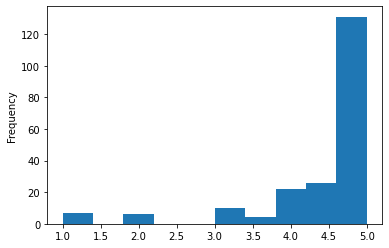

In [13]:
data.describe().T['mean'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

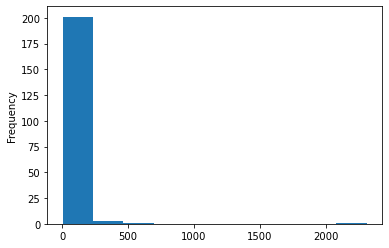

In [14]:
data.describe().T['count'].plot(kind='hist')

In [15]:
data.describe().T['count'].max()

2313.0

In [16]:
data.describe().T['count'].sort_values(ascending = False)[:1]  #Max view

Movie127    2313.0
Name: count, dtype: float64

In [17]:
data2.describe().T['count'].sort_values(ascending = False)[:1]  #Max view

Movie127    2313.0
Name: count, dtype: float64

In [16]:
data.fillna(0,inplace=True, axis=0)  #replcae Null with 0 for Data 

In [17]:
data.drop('user_id',axis=1).sum().sort_values(ascending = False)[:1]  #Max rating 

Movie127    9511.0
dtype: float64

In [18]:
data2.drop('user_id',axis=1).sum().sort_values(ascending = False)[:1]  #Max rating 

Movie127    9511.0
dtype: float64

In [21]:
data.drop('user_id',axis=1).mean().sort_values(ascending = False)[:5]   #Mean  5  top

Movie127    1.961840
Movie140    0.576320
Movie16     0.298267
Movie103    0.255982
Movie29     0.240924
dtype: float64

In [105]:
data2.drop('user_id',axis=1).mean().sort_values(ascending = False)[:5]  #

Movie1     5.0
Movie66    5.0
Movie76    5.0
Movie75    5.0
Movie74    5.0
dtype: float64

In [22]:
data2.describe().T['count'].sort_values(ascending = True)[:5]  #Min  audiance

Movie1      1.0
Movie71     1.0
Movie145    1.0
Movie69     1.0
Movie68     1.0
Name: count, dtype: float64

In [19]:

data= data.set_index('user_id').T   #Remove the extra row, and put user_id as index
data.head()

user_id,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,...,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
Movie1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie4,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie5,0.0,0.0,0.0,0.0,5.0,2.0,5.0,2.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data.shape

(206, 4848)

In [21]:
train = data.iloc[:161,:]  #Train set
test= data.iloc[161:,:]    # Test set

In [22]:
from sklearn.model_selection import train_test_split               #Train and Test setup 
trainset, testset = train_test_split(data, test_size= 0.25, random_state=42)

In [23]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine')   #Model 
model_knn.fit(trainset)                         

NearestNeighbors(metric='cosine')

In [33]:
trainset.shape

(154, 4848)

In [48]:
trainset.head()

user_id,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,...,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
Movie204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
testset.head()

user_id,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,...,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
Movie16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
testset.iloc[0]

user_id
A3R5OBKS7OM2IR    0.0
AH3QC2PC1VTGP     0.0
A3LKP6WPMP9UKX    0.0
AVIY68KEPQ5ZD     0.0
A1CV1WROP5KTTW    0.0
                 ... 
A1IMQ9WMFYKWH5    0.0
A1KLIKPUF5E88I    0.0
A5HG6WFZLO10D     0.0
A3UU690TWXCG1X    0.0
AI4J762YI6S06     0.0
Name: Movie16, Length: 4848, dtype: float64

In [68]:
distance, indecs = model_knn.kneighbors(testset.iloc[0,:].values.reshape(1,-1),n_neighbors = 5)
print(testset.index[0])
print(indecs.flatten())
print(distance.flatten())

display(dict(zip(distance.flatten(), data.index[indecs.flatten()])))

Movie16
[ 71  39  38 153 103]
[0.98392349 0.99162303 0.99425373 0.99605272 1.        ]


{0.9839234911052305: 'Movie72',
 0.9916230341794651: 'Movie40',
 0.9942537328957611: 'Movie39',
 0.9960527186149957: 'Movie154',
 1.0: 'Movie104'}

In [26]:
d = {}
for i in range(0,len(testset)):
    distance, indecs = model_knn.kneighbors(testset.iloc[i,:].values.reshape(1,-1),n_neighbors = 5)
    d[i]  = dict(zip(distance.flatten(), data.index[indecs.flatten()]))

In [27]:
display(d)

{0: {0.9839234911052305: 'Movie72',
  0.9916230341794651: 'Movie40',
  0.9942537328957611: 'Movie39',
  0.9960527186149957: 'Movie154',
  1.0: 'Movie104'},
 1: {1.0: 'Movie102'},
 2: {0.989355098216149: 'Movie27', 1.0: 'Movie103'},
 3: {1.0: 'Movie102'},
 4: {1.0: 'Movie102'},
 5: {1.0: 'Movie102'},
 6: {1.0: 'Movie102'},
 7: {1.0: 'Movie102'},
 8: {0.0: 'Movie5', 0.7850332098038262: 'Movie129', 1.0: 'Movie105'},
 9: {0.8556624327025936: 'Movie137', 1.0: 'Movie106'},
 10: {0.5376707990904319: 'Movie86',
  0.6552748733366539: 'Movie106',
  0.8034843809467468: 'Movie40',
  0.9113675771226006: 'Movie102',
  1.0: 'Movie105'},
 11: {1.0: 'Movie102'},
 12: {1.0: 'Movie102'},
 13: {1.0: 'Movie102'},
 14: {1.0: 'Movie102'},
 15: {0.5317070942091531: 'Movie82', 1.0: 'Movie107'},
 16: {0.9911246002339773: 'Movie27', 1.0: 'Movie103'},
 17: {1.0: 'Movie102'},
 18: {0.6765768863234245: 'Movie51',
  0.8382884431617122: 'Movie31',
  1.0: 'Movie107'},
 19: {1.0: 'Movie102'},
 20: {1.0: 'Movie102'},
 2

In [49]:
d[0]

{0.9839234911052305: 'Movie72',
 0.9916230341794651: 'Movie40',
 0.9942537328957611: 'Movie39',
 0.9960527186149957: 'Movie154',
 1.0: 'Movie104'}